# Statsmodels

Statsmodels is a Python module that allows users to explore data, estimate statistical models, and perform statistical tests. An extensive list of descriptive statistics, statistical tests, plotting functions, and result statistics are available for different types of data and each estimator.

Library documentation: <a>http://statsmodels.sourceforge.net/</a>

### Linear Regression Models

In [1]:
# needed to display the graphs
%matplotlib inline
from pylab import *

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
np.random.seed(9876789)

In [3]:
# create some artificial data
nsample = 100
x = np.linspace(0, 10, 100)
X = np.column_stack((x, x**2))
beta = np.array([1, 0.1, 10])
e = np.random.normal(size=nsample)

In [4]:
# add column of 1s for intercept
X = sm.add_constant(X)
y = np.dot(X, beta) + e

In [5]:
# fit model and print the summary
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.020e+06
Date:                Sun, 16 Nov 2014   Prob (F-statistic):          2.83e-239
Time:                        20:59:31   Log-Likelihood:                -146.51
No. Observations:                 100   AIC:                             299.0
Df Residuals:                      97   BIC:                             306.8
Df Model:                           2                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.3423      0.313      4.292      0.000         0.722     1.963
x1            -0.0402      0.145     -0.278      0.7

In [6]:
# individual results parameters can be accessed
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

('Parameters: ', array([  1.34233516,  -0.04024948,  10.01025357]))
('R2: ', 0.9999879365025871)


In [7]:
# example with non-linear relationship
nsample = 50
sig = 0.5
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, np.sin(x), (x-5)**2, np.ones(nsample)))
beta = [0.5, 0.5, -0.02, 5.]

y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

res = sm.OLS(y, X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     211.8
Date:                Sun, 16 Nov 2014   Prob (F-statistic):           6.30e-27
Time:                        20:59:31   Log-Likelihood:                -34.438
No. Observations:                  50   AIC:                             76.88
Df Residuals:                      46   BIC:                             84.52
Df Model:                           3                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.4687      0.026     17.751      0.000         0.416     0.522
x2             0.4836      0.104      4.659      0.0

In [8]:
# look at some quantities of interest
print('Parameters: ', res.params)
print('Standard errors: ', res.bse)
print('Predicted values: ', res.predict())

('Parameters: ', array([ 0.46872448,  0.48360119, -0.01740479,  5.20584496]))
('Standard errors: ', array([ 0.02640602,  0.10380518,  0.00231847,  0.17121765]))
('Predicted values: ', array([  4.77072516,   5.22213464,   5.63620761,   5.98658823,
         6.25643234,   6.44117491,   6.54928009,   6.60085051,
         6.62432454,   6.6518039 ,   6.71377946,   6.83412169,
         7.02615877,   7.29048685,   7.61487206,   7.97626054,
         8.34456611,   8.68761335,   8.97642389,   9.18997755,
         9.31866582,   9.36587056,   9.34740836,   9.28893189,
         9.22171529,   9.17751587,   9.1833565 ,   9.25708583,
         9.40444579,   9.61812821,   9.87897556,  10.15912843,
        10.42660281,  10.65054491,  10.8063004 ,  10.87946503,
        10.86825119,  10.78378163,  10.64826203,  10.49133265,
        10.34519853,  10.23933827,  10.19566084,  10.22490593,
        10.32487947,  10.48081414,  10.66779556,  10.85485568,
        11.01006072,  11.10575781]))


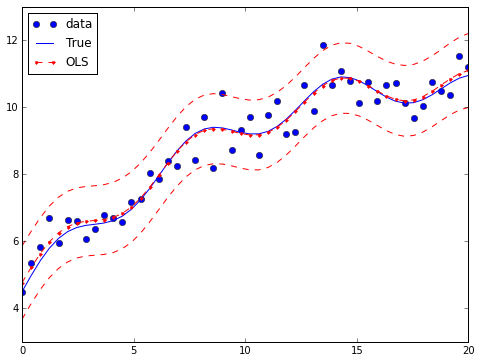

In [9]:
# plot the true relationship vs. the prediction
prstd, iv_l, iv_u = wls_prediction_std(res)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, y, 'o', label="data")
ax.plot(x, y_true, 'b-', label="True")
ax.plot(x, res.fittedvalues, 'r--.', label="OLS")
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')
ax.legend(loc='best')

### Time-Series Analysis

In [10]:
from statsmodels.tsa.arima_process import arma_generate_sample

In [11]:
# generate some data
np.random.seed(12345)
arparams = np.array([.75, -.25])
maparams = np.array([.65, .35])

In [12]:
# set parameters
arparams = np.r_[1, -arparams]
maparam = np.r_[1, maparams]
nobs = 250
y = arma_generate_sample(arparams, maparams, nobs)

In [13]:
# add some dates information
dates = sm.tsa.datetools.dates_from_range('1980m1', length=nobs)
y = pd.TimeSeries(y, index=dates)
arma_mod = sm.tsa.ARMA(y, order=(2,2))
arma_res = arma_mod.fit(trend='nc', disp=-1)

In [14]:
print(arma_res.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  250
Model:                     ARMA(2, 2)   Log Likelihood                -245.887
Method:                       css-mle   S.D. of innovations              0.645
Date:                Sun, 16 Nov 2014   AIC                            501.773
Time:                        20:59:32   BIC                            519.381
Sample:                    01-31-1980   HQIC                           508.860
                         - 10-31-2000                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
ar.L1.y        0.8411      0.403      2.089      0.038         0.052     1.630
ar.L2.y       -0.2693      0.247     -1.092      0.276        -0.753     0.214
ma.L1.y        0.5352      0.412      1.299      0.1